Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import mdst

## Data Exploration

In [2]:
df = pd.read_csv(r'Jupyter NB Data\ESSdata_Thinkful.csv')

In [3]:
mdst.null_summary(df)

total rows:  8594


,null_counts,pct_nulls,dtype
cntry,0,0,object
idno,0,0,float64
year,0,0,int64
tvtot,8,0.0931,float64
ppltrst,14,0.1629,float64
pplfair,39,0.4538,float64
pplhlp,25,0.2909,float64
happy,31,0.3607,float64
sclmeet,15,0.1745,float64
sclact,94,1.0938,float64


In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.year.value_counts()
# 6 is for 2012. 7 is for 2014. We had an equal . Should be the same people in each.

7    4297
6    4297
Name: year, dtype: int64

How do we tell who are the same respondents between the 2012 and 2014 surveys?

ID number should work but we have some ID numbers used up to 8 times.

In [6]:
df.idno.value_counts().value_counts()
# 2101 id numbers used twice, 776 used 4 times...

2    2101
4     776
6     192
8      17
Name: idno, dtype: int64

In [7]:
# here is an id # used 8 times
df[df.idno==1405]

# id numbers seem to be re-used in different countries

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
381,CH,1405.0,6,4.0,0.0,7.0,6.0,7.0,4.0,3.0,2.0,NaN,1.0
1154,CH,1405.0,7,3.0,5.0,6.0,4.0,9.0,5.0,1.0,2.0,63.0,1.0
1945,CZ,1405.0,6,6.0,2.0,5.0,3.0,10.0,6.0,3.0,2.0,31.0,2.0
2603,CZ,1405.0,7,7.0,0.0,0.0,0.0,10.0,7.0,3.0,1.0,43.0,2.0
3470,ES,1405.0,6,7.0,5.0,5.0,8.0,8.0,6.0,4.0,1.0,74.0,NaN
4683,ES,1405.0,7,6.0,7.0,6.0,5.0,5.0,7.0,3.0,1.0,67.0,1.0
7180,SE,1405.0,6,4.0,8.0,8.0,8.0,9.0,6.0,3.0,2.0,54.0,1.0
8088,SE,1405.0,7,1.0,7.0,7.0,5.0,7.0,7.0,3.0,1.0,55.0,1.0


In [8]:
# lets look at idno by country
for country in set(df['cntry']):
    print('\ncountry: ', country)
    print(df[df['cntry']==country]['idno'].value_counts().value_counts())
    
# okay good. exactly 2 of each id number in each country


country:  ES
2    1213
Name: idno, dtype: int64

country:  NO
2    731
Name: idno, dtype: int64

country:  CZ
2    658
Name: idno, dtype: int64

country:  SE
2    908
Name: idno, dtype: int64

country:  CH
2    773
Name: idno, dtype: int64

country:  DE
2    14
Name: idno, dtype: int64


In [9]:
set(df['cntry'])
# 6 countries in order: Switzerland, Czech Rep., Germany, 
# Spain, Norway, Sweden 

{'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'}

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

## Is variable normal?

Histograms below. Most countries look fairly normal (a slight skew one way or another on some). Germany looks strange, but sample size is small.

Switzerland
respondents  1546


c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


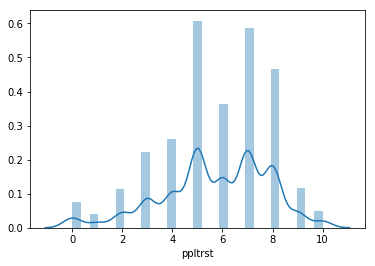

In [10]:
print('Switzerland')
print('respondents ', len(df[df.cntry=='CH']))
sns.distplot(df[df.cntry=='CH']['ppltrst'].dropna())

Czech Republic
respondents  1316


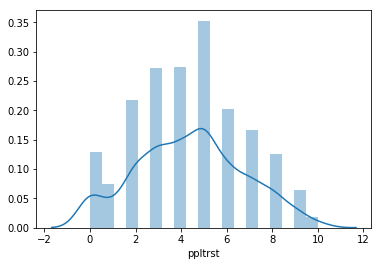

In [11]:
print('Czech Republic')
print('respondents ', len(df[df.cntry=='CZ']))
sns.distplot(df[df.cntry=='CZ']['ppltrst'].dropna())

Germany
respondents  28


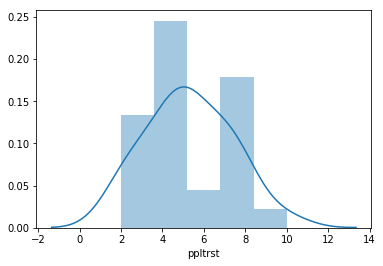

In [12]:
print('Germany')
print('respondents ', len(df[df.cntry=='DE']))
sns.distplot(df[df.cntry=='DE']['ppltrst'].dropna())

Spain
respondents  2426


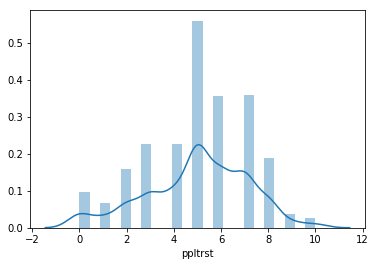

In [13]:
print('Spain')
print('respondents ', len(df[df.cntry=='ES']))
sns.distplot(df[df.cntry=='ES']['ppltrst'].dropna())

Norway
respondents  1462


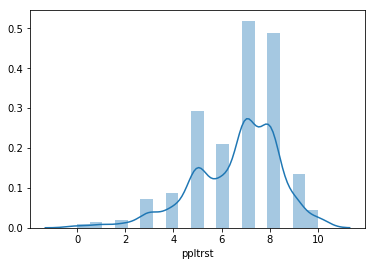

In [14]:
print('Norway')
print('respondents ', len(df[df.cntry=='NO']))
sns.distplot(df[df.cntry=='NO']['ppltrst'].dropna())

Sweden
respondents  1816


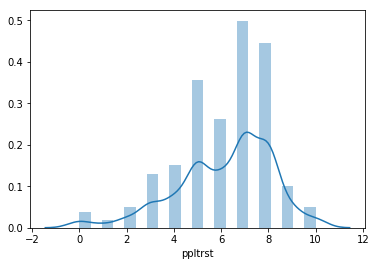

In [15]:
print('Sweden')
print('respondents ', len(df[df.cntry=='SE']))
sns.distplot(df[df.cntry=='SE']['ppltrst'].dropna())

## Paired t-test

### All Countries

In [16]:
df_2012= df[df['year']==6]
df_2014= df[df['year']==7]

In [17]:
# showing nans because of null vals
stats.ttest_rel(list(df_2012['ppltrst']), list(df_2014['ppltrst']))

c:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_relResult(statistic=nan, pvalue=nan)

c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


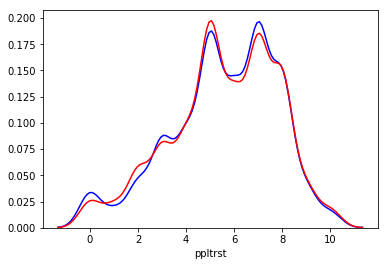

In [18]:
sns.distplot(df_2012['ppltrst'], color='blue', hist=False)
sns.distplot(df_2014['ppltrst'], color='red', hist=False)

### Switzerland

In [19]:
swiss_df = df[df['cntry']=='CH']
swiss_df_2012= swiss_df[swiss_df['year']==6]
swiss_df_2014= swiss_df[swiss_df['year']==7]

In [20]:
# check that idno are in same order 
list(swiss_df_2012['idno']) == list(swiss_df_2014['idno'])

True

In [21]:
stats.ttest_rel(list(swiss_df_2012['ppltrst']), list(swiss_df_2014['ppltrst']))

Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

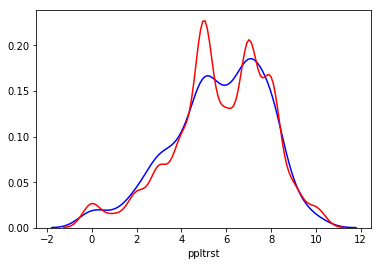

In [22]:
sns.distplot(swiss_df_2012['ppltrst'], color='blue', hist=False)
sns.distplot(swiss_df_2014['ppltrst'], color='red', hist=False)

### Czech Republic

In [23]:
cz_df = df[df['cntry']=='CZ']
cz_df = cz_df.copy()

# drop ids with nulls in ppltrst
id_drops = set(cz_df[cz_df['ppltrst'].isnull()]['idno'])
cz_df = cz_df[cz_df.idno.isin(id_drops)==False]

cz_df_2012= cz_df[cz_df['year']==6]
cz_df_2014= cz_df[cz_df['year']==7]

In [24]:
# check that idno are in same order 
list(cz_df_2012['idno']) == list(cz_df_2014['idno'])

True

In [25]:
stats.ttest_rel(list(cz_df_2012['ppltrst']), list(cz_df_2014['ppltrst']))

Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)

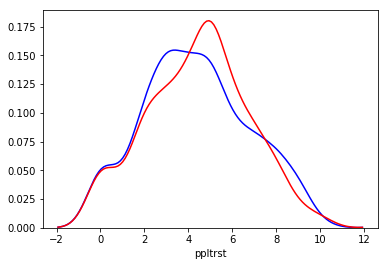

In [26]:
sns.distplot(cz_df_2012['ppltrst'], color='blue', hist=False)
sns.distplot(cz_df_2014['ppltrst'], color='red', hist=False)

### Germany

In [27]:
de_df = df[df['cntry']=='DE']
de_df = de_df.copy()

# drop ids with nulls in ppltrst
id_drops = set(de_df[de_df['ppltrst'].isnull()]['idno'])
de_df = de_df[de_df.idno.isin(id_drops)==False]

de_df_2012= de_df[de_df['year']==6]
de_df_2014= de_df[de_df['year']==7]

# check that idno are in same order 
list(de_df_2012['idno']) == list(de_df_2014['idno'])

True

In [28]:
stats.ttest_rel(list(de_df_2012['ppltrst']), list(de_df_2014['ppltrst']))

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

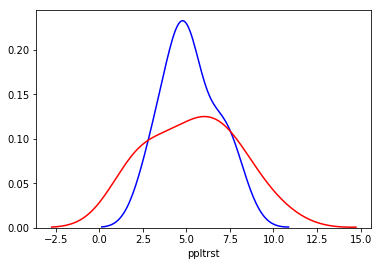

In [29]:
sns.distplot(de_df_2012['ppltrst'], color='blue', hist=False)
sns.distplot(de_df_2014['ppltrst'], color='red', hist=False)

### Spain

In [30]:
es_df = df[df['cntry']=='ES']
es_df = es_df.copy()

# drop ids with nulls in ppltrst
id_drops = set(es_df[es_df['ppltrst'].isnull()]['idno'])
es_df = es_df[es_df.idno.isin(id_drops)==False]

es_df_2012= es_df[es_df['year']==6]
es_df_2014= es_df[es_df['year']==7]

# check that idno are in same oresr 
list(es_df_2012['idno']) == list(es_df_2014['idno'])

True

In [31]:
stats.ttest_rel(list(es_df_2012['ppltrst']), list(es_df_2014['ppltrst']))

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)

2422


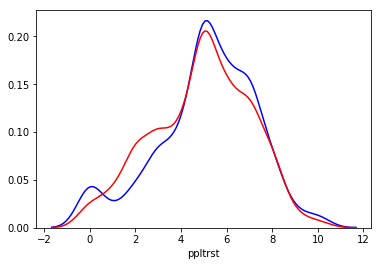

In [32]:
print(len(es_df))
sns.distplot(es_df_2012['ppltrst'], color='blue', hist=False)
sns.distplot(es_df_2014['ppltrst'], color='red', hist=False)

### Norway

In [33]:
no_df = df[df['cntry']=='NO']
no_df = no_df.copy()

# drop ids with nulls in ppltrst
id_drops = set(no_df[no_df['ppltrst'].isnull()]['idno'])
no_df = no_df[no_df.idno.isin(id_drops)==False]

no_df_2012= no_df[no_df['year']==6]
no_df_2014= no_df[no_df['year']==7]

# check that idno are in same ornor 
list(no_df_2012['idno']) == list(no_df_2014['idno'])

True

In [34]:
stats.ttest_rel(list(no_df_2012['ppltrst']), list(no_df_2014['ppltrst']))

Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)

1458


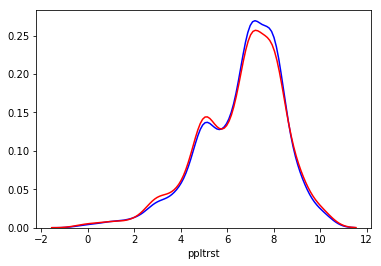

In [35]:
print(len(no_df))
sns.distplot(no_df_2012['ppltrst'], color='blue', hist=False)
sns.distplot(no_df_2014['ppltrst'], color='red', hist=False)

### Sweden

In [36]:
se_df = df[df['cntry']=='SE']
se_df = se_df.copy()

# drop ids with nulls in ppltrst
id_drops = set(se_df[se_df['ppltrst'].isnull()]['idno'])
se_df = se_df[se_df.idno.isin(id_drops)==False]

se_df_2012= se_df[se_df['year']==6]
se_df_2014= se_df[se_df['year']==7]

# check that idse are in same orser 
list(se_df_2012['idno']) == list(se_df_2014['idno'])

True

In [37]:
stats.ttest_rel(list(se_df_2012['ppltrst']), list(se_df_2014['ppltrst']))

Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)

In [38]:
print(se_df_2012['ppltrst'].mean())
print(se_df_2014['ppltrst'].mean())

6.058498896247241
6.257174392935982


1458


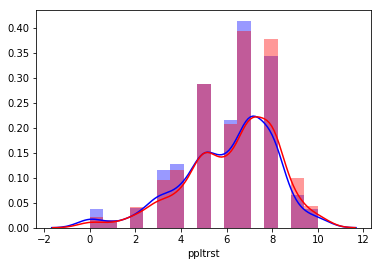

In [39]:
print(len(no_df))
sns.distplot(se_df_2012['ppltrst'], color='blue',)
sns.distplot(se_df_2014['ppltrst'], color='red', )

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

## Is variable normal?

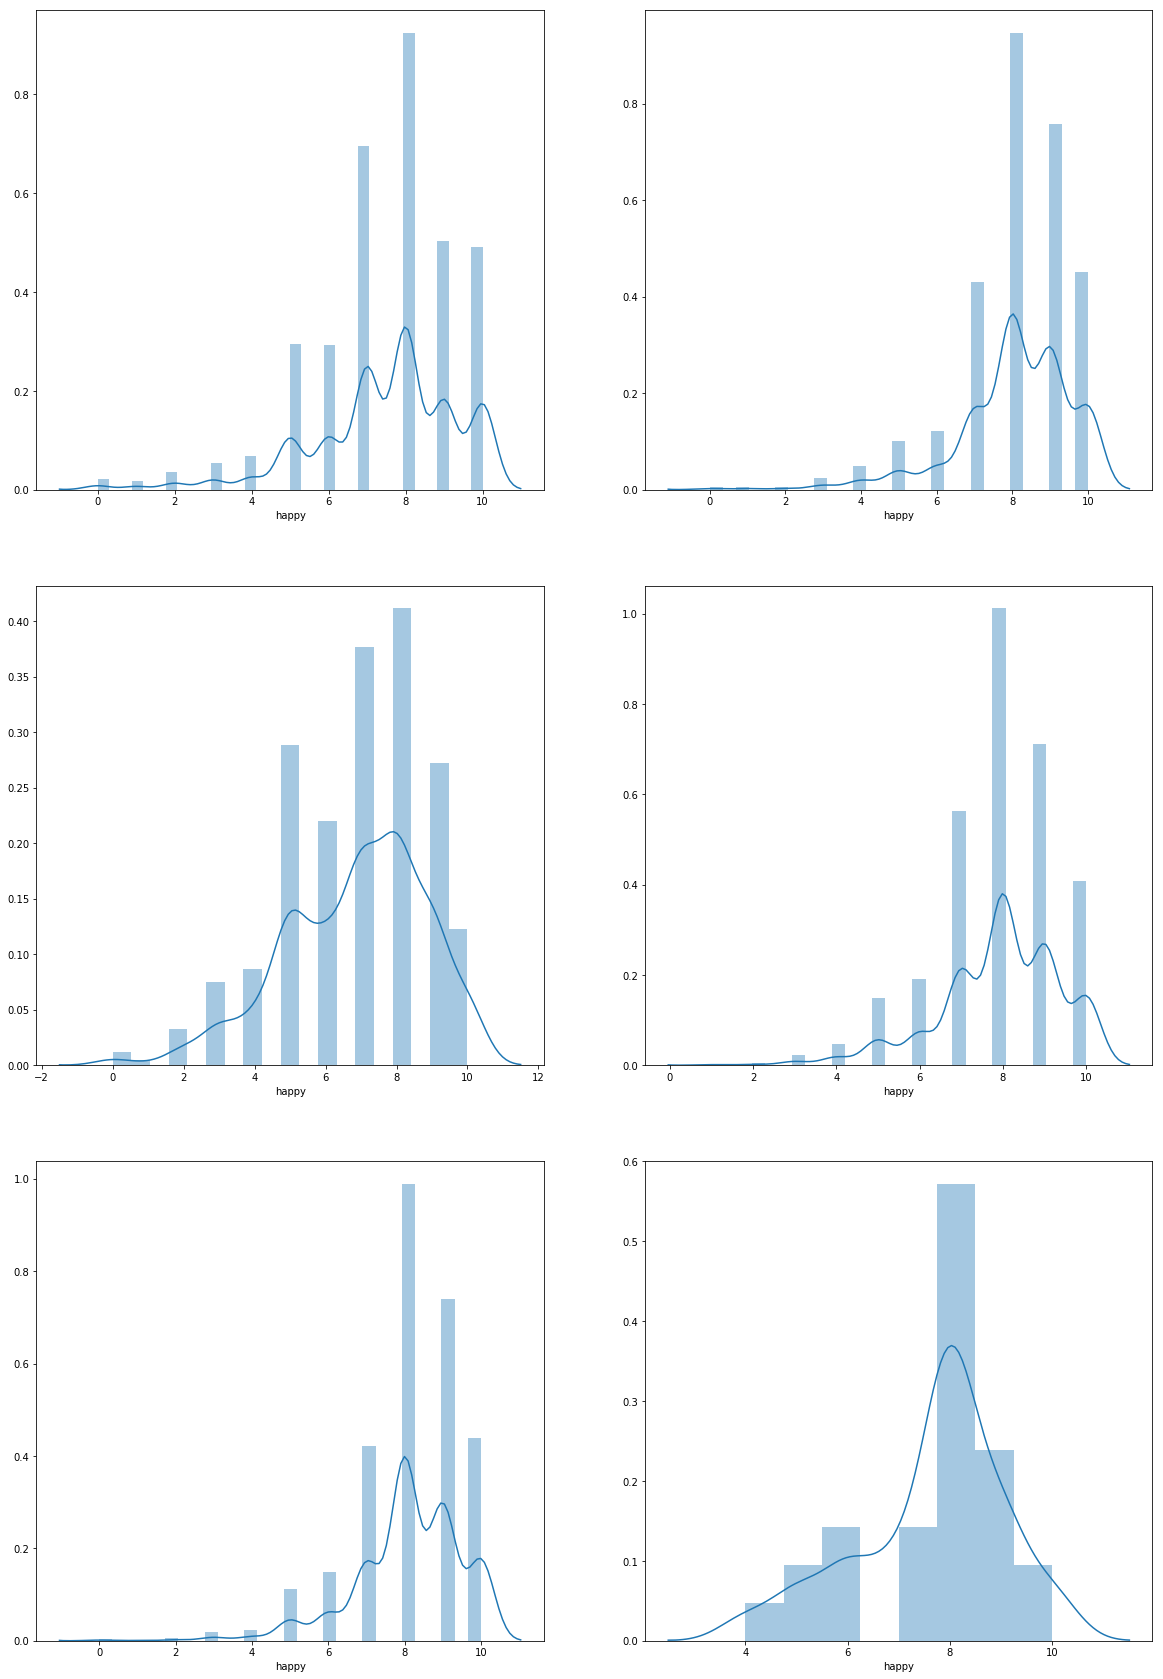

In [40]:
fig, axes = plt.subplots(3,2, figsize=(20,30))

countries = set(df['cntry'])
for i, country in enumerate(countries):
    sns.distplot(df[df.cntry==country]['happy'].dropna(), ax=axes[i//2, i%2])

In [41]:
no_df = df[df['cntry']=='NO']
no_df = no_df.copy()

# drop ids with nulls in ppltrst
id_drops = set(no_df[no_df['ppltrst'].isnull()]['idno'])
no_df = no_df[no_df.idno.isin(id_drops)==False]

no_df_2012= no_df[no_df['year']==6]
no_df_2014= no_df[no_df['year']==7]

# check that idno are in same ornor 
list(no_df_2012['idno']) == list(no_df_2014['idno'])

True

In [42]:
no_df_2014['happy'].value_counts()

8.0     230
9.0     178
7.0     125
10.0     97
6.0      40
5.0      32
4.0      14
3.0       8
1.0       2
0.0       2
2.0       1
Name: happy, dtype: int64

In [43]:
no_df_2012['happy'].value_counts()

8.0     245
9.0     202
10.0    130
7.0      91
6.0      20
5.0      19
4.0      11
3.0       4
2.0       2
1.0       1
0.0       1
Name: happy, dtype: int64

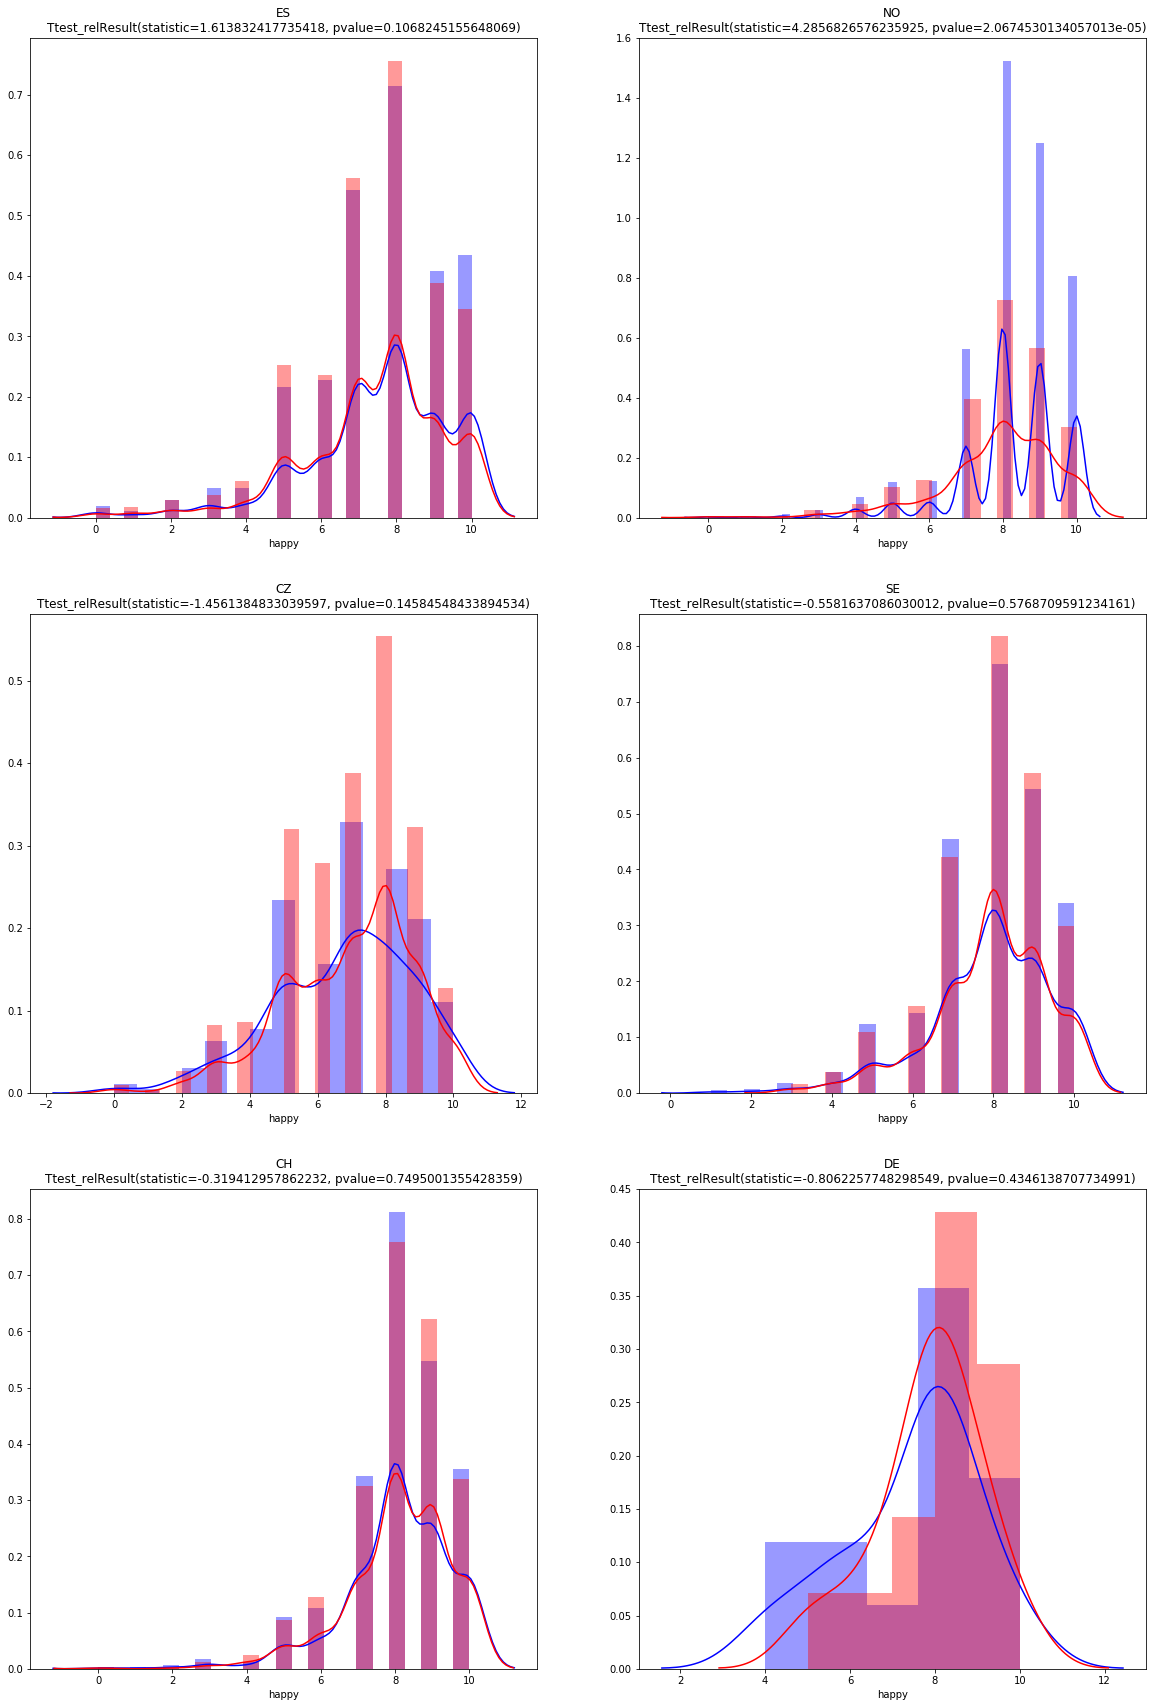

In [44]:
fig, axes = plt.subplots(3,2, figsize=(20,30))

for i, country in enumerate(countries):
    cntry_df = df[df['cntry']==country].copy()
    id_drops = set(cntry_df[cntry_df['happy'].isnull()]['idno'])
    cntry_df = cntry_df[cntry_df.idno.isin(id_drops)==False]
    
    cntry_df_2012= cntry_df[cntry_df['year']==6]
    cntry_df_2014= cntry_df[cntry_df['year']==7]

    # check that idno are in same ornor 
    assert list(no_df_2012['idno']) == list(no_df_2014['idno'])
    
    test = stats.ttest_rel(list(cntry_df_2012['happy']), list(cntry_df_2014['happy']))
    
    axes[i//2, i%2].set_title('{}\n{}'.format(country, test))
    sns.distplot(cntry_df_2012['happy'], ax=axes[i//2, i%2], color='blue',  )
    sns.distplot(cntry_df_2014['happy'], ax=axes[i//2, i%2], color='red', )

# Who reported watching more TV in 2012, men or women?

male avg : 3.8592303945445687
female avg : 3.9053518334985133


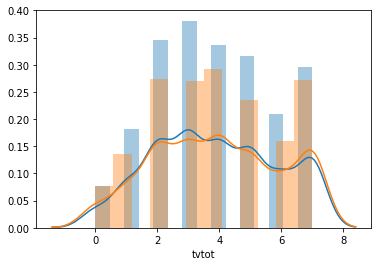

In [45]:
m_df = df[(df['year']==6)&(df['gndr']==1)].dropna()
w_df = df[(df['year']==6)&(df['gndr']==2)].dropna()

print('male avg :', m_df['tvtot'].mean())
print('female avg :', w_df['tvtot'].mean())
sns.distplot(m_df['tvtot'])
sns.distplot(w_df['tvtot'])

In [46]:
stats.ttest_ind(m_df['tvtot'], w_df['tvtot'])

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)

In [47]:
stats.kruskal(m_df['tvtot'], w_df['tvtot'])

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

Women watched a little more, but not significant at .05 level

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [48]:
df['partner'].value_counts()

1.0    5276
2.0    3301
Name: partner, dtype: int64

partner avg : 6.0743509047993705
alone avg : 5.86592544146501


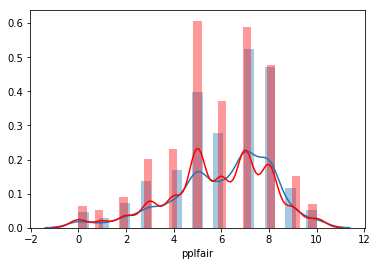

In [49]:
p_df = df[(df['year']==6)&(df['partner']==1)].dropna()
a_df = df[(df['year']==6)&(df['partner']==2)].dropna()

print('partner avg :', p_df['pplfair'].mean())
print('alone avg :', a_df['pplfair'].mean())
sns.distplot(p_df['pplfair'])
sns.distplot(a_df['pplfair'], color='red')

In [50]:
stats.ttest_ind(p_df['pplfair'], a_df['pplfair'])

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)

In [51]:
stats.kruskal(p_df['pplfair'], a_df['pplfair'])

KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [52]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

CZ mean:  4.442040185471407
NO mean:  5.299039780521262
DE mean:  4.428571428571429


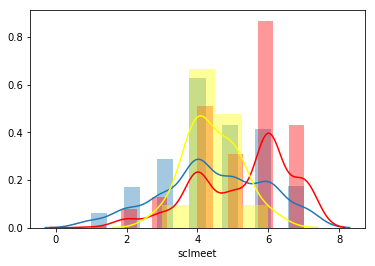

In [53]:
print('CZ mean: ', cz_df_2014['sclmeet'].dropna().mean())
print('NO mean: ', no_df_2014['sclmeet'].dropna().mean())
print('DE mean: ', de_df_2014['sclmeet'].dropna().mean())

# czech rep in blue
sns.distplot(cz_df_2014['sclmeet'].dropna())

# Norway in red
sns.distplot(no_df_2014['sclmeet'].dropna(), color='red')

# Germany in yellow
sns.distplot(de_df_2014['sclmeet'].dropna(), color='yellow')

In [54]:
stats.f_oneway(cz_df_2014['sclmeet'].dropna(), no_df_2014['sclmeet'].dropna(), de_df_2014['sclmeet'].dropna())

F_onewayResult(statistic=64.16239027414497, pvalue=2.235142237610703e-27)

In [55]:
# t-test Czech Republic vs. Norway
stats.ttest_ind(cz_df_2014['sclmeet'].dropna(), no_df_2014['sclmeet'].dropna())

Ttest_indResult(statistic=-11.222765680365262, pvalue=5.005774114930722e-28)

In [56]:
# t-test Czech Republic vs Germany
stats.ttest_ind(cz_df_2014['sclmeet'].dropna(), de_df_2014['sclmeet'].dropna())

Ttest_indResult(statistic=0.033834912878561864, pvalue=0.9730190407415849)

In [57]:
# t-test Norway vs. Germany
stats.ttest_ind(de_df_2014['sclmeet'].dropna(), no_df_2014['sclmeet'].dropna())

Ttest_indResult(statistic=-2.40785763991856, pvalue=0.016289782214929754)

In [58]:
# t-test Norway vs. Germany + Czech Republic
stats.ttest_ind(no_df_2014['sclmeet'].dropna(), list(de_df_2014['sclmeet'].dropna())+list(cz_df_2014['sclmeet'].dropna()))

Ttest_indResult(statistic=11.332075331723887, pvalue=1.56248380393686e-28)

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

CZ mean:  2.6993769470404985
NO mean:  2.8573388203017833
DE mean:  2.7142857142857144


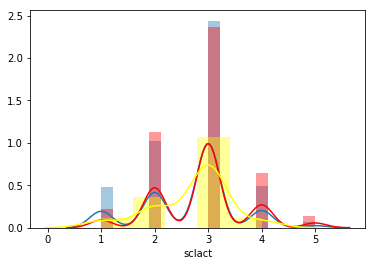

In [59]:
print('CZ mean: ', cz_df_2014['sclact'].dropna().mean())
print('NO mean: ', no_df_2014['sclact'].dropna().mean())
print('DE mean: ', de_df_2014['sclact'].dropna().mean())

# czech rep in blue
sns.distplot(cz_df_2014['sclact'].dropna())

# Norway in red
sns.distplot(no_df_2014['sclact'].dropna(), color='red')

# Germany in yellow
sns.distplot(de_df_2014['sclact'].dropna(), color='yellow')

In [60]:
stats.f_oneway(cz_df_2014['sclact'].dropna(), no_df_2014['sclact'].dropna(), de_df_2014['sclact'].dropna())

F_onewayResult(statistic=6.083623123554306, pvalue=0.002341417162099698)

In [61]:
# t-test Czech Republic vs. Norway
stats.ttest_ind(cz_df_2014['sclact'].dropna(), no_df_2014['sclact'].dropna())

Ttest_indResult(statistic=-3.470537952550012, pvalue=0.0005355625004858294)

In [62]:
# t-test Czech Republic vs Germany
stats.ttest_ind(cz_df_2014['sclact'].dropna(), de_df_2014['sclact'].dropna())

Ttest_indResult(statistic=-0.06483295023655261, pvalue=0.948326817919654)

In [63]:
# t-test Norway vs. Germany
stats.ttest_ind(de_df_2014['sclact'].dropna(), no_df_2014['sclact'].dropna())

Ttest_indResult(statistic=-0.6403231498433076, pvalue=0.5221604794577883)

In [64]:
# t-test Norway vs. Germany + Czech Republic
stats.ttest_ind(no_df_2014['sclact'].dropna(), list(de_df_2014['sclact'].dropna())+list(cz_df_2014['sclact'].dropna()))

Ttest_indResult(statistic=3.4887952861862894, pvalue=0.000500428868258422)

In [65]:
# t-test Norway + Germany vs.Czech Republic
stats.ttest_ind(list(de_df_2014['sclact'].dropna())+list(no_df_2014['sclact'].dropna()), cz_df_2014['sclact'].dropna())

Ttest_indResult(statistic=3.431315474096622, pvalue=0.0006183673862226082)